In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfr = pd.read_csv(r'winequality-red.csv', sep=';')
dfw = pd.read_csv(r'winequality-white.csv', sep=';')

# 颜色
color = sns.color_palette()
# 数据print精度
pd.set_option('precision', 3)

In [2]:
dfr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5


In [3]:
dfw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.995,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6


In [4]:
#增加总酸
dfr['total acid'] = dfr['fixed acidity'] + dfr['volatile acidity']
dfw['total acid'] = dfw['fixed acidity'] + dfw['volatile acidity']
#移动dfr总酸到列首
r = dfr.columns.tolist()
r.insert(0,r.pop())
dfr = dfr.reindex(columns=r)
#移动dfw总酸到列首
r = dfw.columns.tolist()
r.insert(0,r.pop())
dfw = dfw.reindex(columns=r)

In [5]:
dfr.describe()

,total acid,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.847,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.704,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,5.120,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.680,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,8.445,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.740,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,16.285,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [6]:
dfw.describe()

,total acid,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000
mean,7.133,6.855,0.278,0.334,6.391,0.046,35.308,138.361,0.994,3.188,0.490,10.514,5.878
std,0.848,0.844,0.101,0.121,5.072,0.022,17.007,42.498,0.003,0.151,0.114,1.231,0.886
min,4.110,3.800,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000
25%,6.570,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.090,0.410,9.500,5.000
50%,7.070,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400,6.000
75%,7.590,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400,6.000
max,14.470,14.200,1.100,1.660,65.800,0.346,289.000,440.000,1.039,3.820,1.080,14.200,9.000


In [7]:
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname="苹方字体.ttf")

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  app.launch_new_instance()


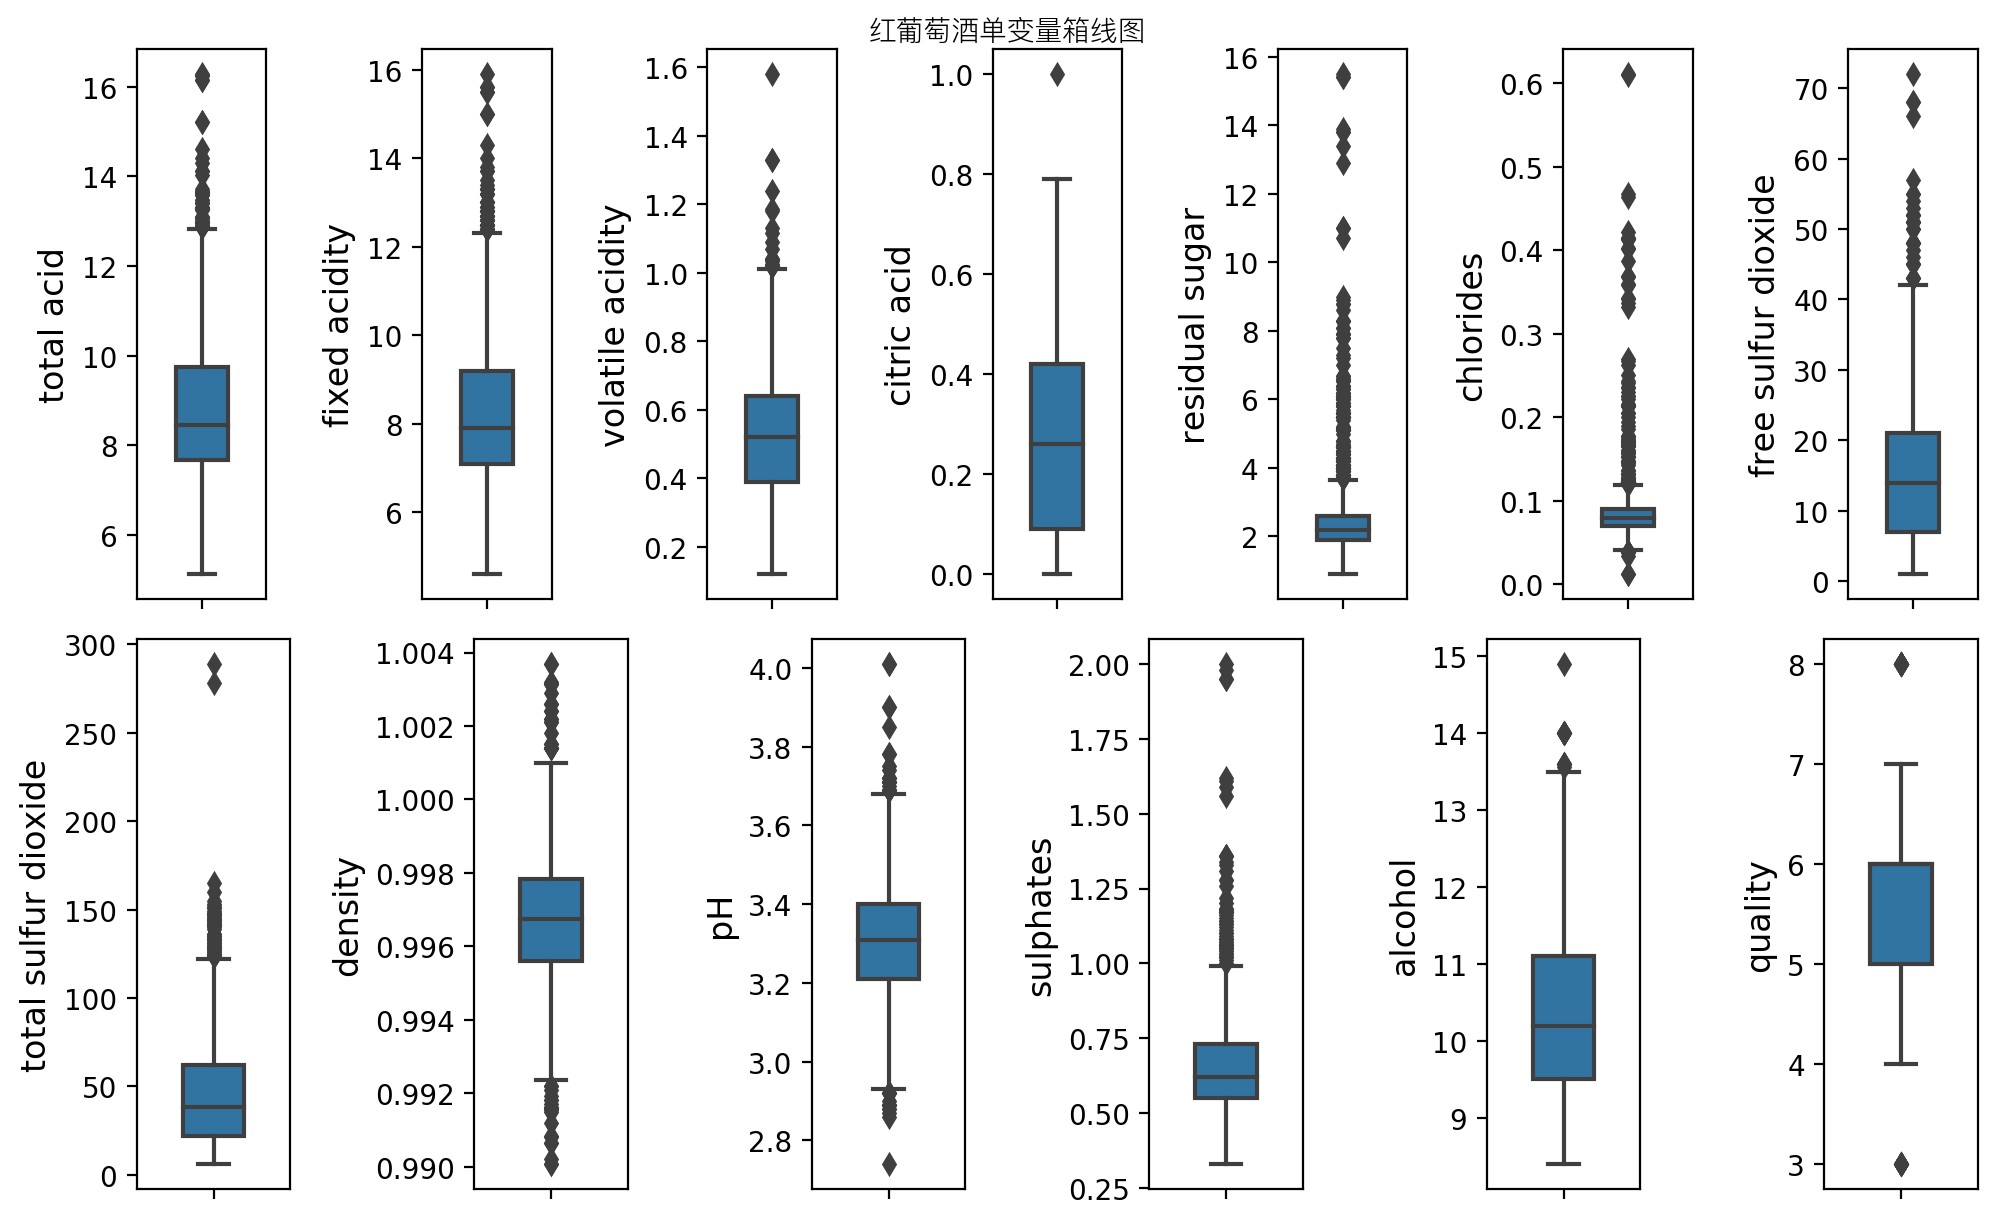

In [9]:
# 红葡单变量箱线图
colnum_red = dfr.columns.tolist()
plt.figure(figsize=(10, 6), dpi=200)
plt.suptitle('红葡萄酒单变量箱线图', y=1.00, fontproperties=my_font)  # 总标题
# 画第一行的图
for i in range(7):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(dfr[colnum_red[i]], orient="v", width=0.4, color=color[0])
    plt.ylabel(colnum_red[i], fontsize=12)
plt.tight_layout()
# 画第二行的图
for i in range(6):
    plt.subplot(2, 6, i + 7)
    sns.boxplot(dfr[colnum_red[i + 7]], orient="v", width=0.4, color=color[0])
    plt.ylabel(colnum_red[i + 7], fontsize=12)
plt.tight_layout()
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  app.launch_new_instance()


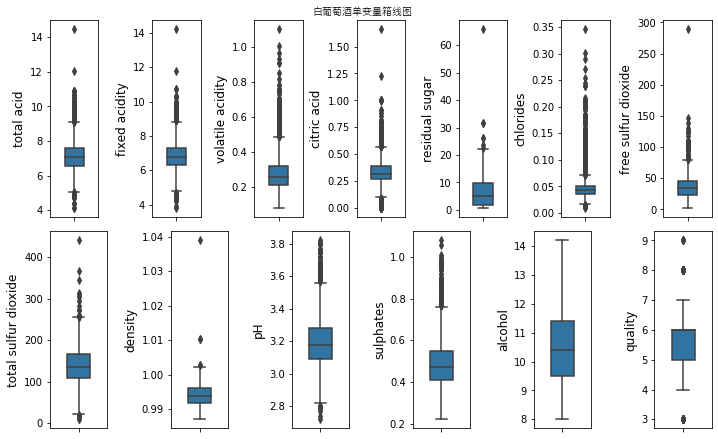

In [10]:
# 白葡单变量箱线图
colnum_white = dfw.columns.tolist()
plt.figure(figsize=(10, 6))
plt.suptitle('白葡萄酒单变量箱线图', y=1.00, fontproperties=my_font)  # 总标题
# 画第一行的图
for i in range(7):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(dfw[colnum_white[i]], orient="v", width=0.4, color=color[0])
    plt.ylabel(colnum_white[i], fontsize=12)
plt.tight_layout()
# 画第二行的图
for i in range(6):
    plt.subplot(2, 6, i + 7)
    sns.boxplot(dfw[colnum_white[i + 7]], orient="v", width=0.4, color=color[0])
    plt.ylabel(colnum_white[i + 7], fontsize=12)
plt.tight_layout()
plt.show()